In [1]:
import pandas as pd
import os
from collections import Counter
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pickle
import glob

In [16]:
# Read in Metadata
basefolder = ""
datafolder = ""
plotsfolder = 'plots'
namesfile = "all_sample_metadata.csv"
metadata = pd.read_csv(os.path.join(basefolder, namesfile))
# exclude samples with unknown age
metadata_age = metadata[~metadata['Age'].isin(['Unknown', 'nk'])]
metadata_gDNA = metadata[metadata['gDNA']==1]
all_gca_tcrs = pd.read_csv(os.path.join(basefolder,'TCRs_for_clustering/all_GCA_tcrs_clean_nodup.csv'))
tcrs_to_analyze = pd.read_csv(os.path.join(basefolder,'resulting_TCRs/', 'clustering1and3_top1000_highandmedconf.csv'))
tcrs_to_analyze['Subject_ID'] = tcrs_to_analyze['Name'].apply(lambda x: int(x.split('-')[0]))

In [4]:
all_controls = metadata_gDNA[metadata_gDNA['Control Status'] == 1]
metadata_GCA = metadata_gDNA[metadata_gDNA['GCA Status'] == 1]

In [5]:
# Control V gene distribution
control_counter = {}
control_counter_J = {}
def build_metacounter(counter, metacounter):
    for key in counter.keys():
        if key in metacounter.keys():
            metacounter[key] += counter[key]
        else:
            metacounter[key] = counter[key]
    return metacounter

for name in all_controls['Name']:
    if len(glob.glob(os.path.join(basefolder, 'cleaned data', str(name)+'*_cleaned_2.txt'))) > 0:
        for filename in glob.glob(os.path.join(basefolder, 'cleaned data', str(name)+'*_cleaned_2.txt')):
            genes = pd.read_csv(filename, usecols=['bestVHit', 'bestJHit'])
    else:
        print(name)
        print(os.path.join(basefolder, 'cleaned data', str(name)+'*_cleaned_2.txt'))
    
    counts = Counter(genes['bestVHit'])
    control_counter = build_metacounter(counts, control_counter)
    jcounts = Counter(genes['bestJHit'])
    control_counter_J = build_metacounter(jcounts, control_counter_J)

In [17]:
# Read in suspicious clone data
V_gene_counter = Counter(tcrs_to_analyze['v_b_gene'])
clone_data_nodoubles = tcrs_to_analyze.drop_duplicates(subset=['cdr3_b_aa', 'v_b_gene'])
V_gene_counter_nodoubles = Counter(clone_data_nodoubles['v_b_gene'])

In [7]:
# Calculate Frequencies to compare
sample_total = np.sum([x for x in V_gene_counter.values()])
control_total = np.sum([x for x in control_counter.values()])
print(sample_total, control_total)
frequencies = []
for segment in V_gene_counter.keys():
    freq_sample = V_gene_counter[segment]/sample_total
    freq_control = control_counter[segment]/control_total
    difference = freq_sample - freq_control
    frequencies.append([segment, freq_sample, freq_control, difference, V_gene_counter[segment]])
frequencies = pd.DataFrame(frequencies, columns=['VGene', 'freq_sample', 'freq_control', 'difference', 'counts_sample'])

1526 526903


In [8]:
frequencies[np.abs(frequencies['difference']) >= 0.02].sort_values(by='freq_sample')

,VGene,freq_sample,freq_control,difference,counts_sample
38,TRBV5-6*01,0.003277,0.035306,-0.032030,5
21,TRBV5-1*01,0.003932,0.039565,-0.035633,6
27,TRBV5-4*01,0.004587,0.036424,-0.031837,7
33,TRBV18*01,0.005242,0.074441,-0.069198,8
28,TRBV15*02,0.011796,0.038538,-0.026743,18
36,TRBV29-1*01,0.015727,0.100294,-0.084566,24
1,TRBV12-3*01,0.018349,0.040829,-0.022481,28
6,TRBV27*01,0.018349,0.072393,-0.054044,28
12,TRBV19*01,0.019004,0.143594,-0.124590,29
5,TRBV6-5*01,0.026868,0.081114,-0.054246,41


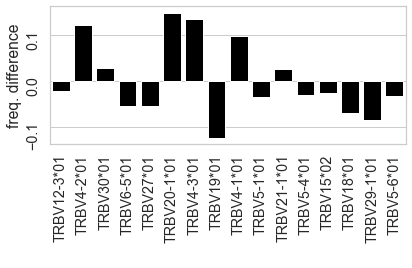

In [9]:
sns.set_theme(style="whitegrid", palette="colorblind", font_scale=1.3)
fig, ax1 = plt.subplots(1, 1, sharex=True, sharey=False)
splot1 = sns.barplot(data=frequencies[np.abs(frequencies['difference']) >= 0.02], x='VGene', y='difference', color='black')
#splot1.yaxis.grid(True, clip_on=False)     
ax1.set_ylabel('freq. difference')
ax1.tick_params(rotation=90)                                     
ax1.set_xlabel(' ')    
#sns.despine(left=True, bottom=True)       
plt.tight_layout()
plt.savefig(os.path.join(basefolder,plotsfolder,'VGene_frequency_theta'+str(THETA)+'_med_high_TCRs_black.pdf'))

In [10]:
dict(sorted(V_gene_counter_nodoubles.items(), key=lambda item: item[1])[::-1])

{'TRBV20-1*01': 290,
 'TRBV4-3*01': 212,
 'TRBV4-2*01': 190,
 'TRBV4-1*01': 152,
 'TRBV30*01': 56,
 'TRBV21-1*01': 47,
 'TRBV6-5*01': 41,
 'TRBV24-1*01': 39,
 'TRBV20-1*02': 35,
 'TRBV6-1*01': 30,
 'TRBV19*01': 29,
 'TRBV27*01': 28,
 'TRBV12-3*01': 28,
 'TRBV29-1*01': 24,
 'TRBV6-2*01': 23,
 'TRBV20-1*04': 21,
 'TRBV10-3*01': 20,
 'TRBV12-5*01': 19,
 'TRBV15*02': 18,
 'TRBV20-1*05': 15,
 'TRBV7-8*01': 14,
 'TRBV6-6*02': 14,
 'TRBV7-9*01': 14,
 'TRBV13*01': 12,
 'TRBV5-3*01': 11,
 'TRBV11-1*01': 11,
 'TRBV6-4*01': 11,
 'TRBV18*01': 8,
 'TRBV30*02': 8,
 'TRBV28*01': 7,
 'TRBV7-2*01': 7,
 'TRBV11-3*01': 7,
 'TRBV5-4*01': 7,
 'TRBV6-6*01': 6,
 'TRBV5-1*01': 6,
 'TRBV7-6*01': 5,
 'TRBV5-6*01': 5,
 'TRBV10-1*02': 5,
 'TRBV11-2*01': 5,
 'TRBV10-2*02': 4,
 'TRBV20-1*06': 4,
 'TRBV6-6*03': 4,
 'TRBV6-8*01': 3,
 'TRBV5-5*01': 3,
 'TRBV7-3*01': 3,
 'TRBV2*01': 3,
 'TRBV11-2*03': 2,
 'TRBV5-3*02': 2,
 'TRBV19*03': 2,
 'TRBV6-3*01': 2,
 'TRBV10-3*02': 2,
 'TRBV4-2*02': 1,
 'TRBV5-5*02': 1,
 'TRBV7-

In [11]:
# same analysis for J genes
J_gene_counter = Counter(tcrs_to_analyze['j_b_gene'])
clone_data_nodoubles = tcrs_to_analyze.drop_duplicates(subset=['cdr3_b_aa', 'j_b_gene'])
J_gene_counter_nodoubles = Counter(clone_data_nodoubles['j_b_gene'])

In [18]:
# Calculate Frequencies to compare
sample_total = np.sum([x for x in J_gene_counter.values()])
control_total = np.sum([x for x in control_counter_J.values()])
print(sample_total, control_total)
frequencies = []
for segment in J_gene_counter.keys():
    freq_sample = J_gene_counter[segment]/sample_total
    freq_control = control_counter_J[segment]/control_total
    difference = freq_sample - freq_control
    frequencies.append([segment, freq_sample, freq_control, difference, J_gene_counter[segment]])
frequencies = pd.DataFrame(frequencies, columns=['JGene', 'freq_sample', 'freq_control', 'difference', 'counts_sample'])

1526 526903


In [13]:
frequencies[np.abs(frequencies['difference']) >= 0.02].sort_values(by='freq_sample')

,JGene,freq_sample,freq_control,difference,counts_sample
8,TRBJ1-4*01,0.017038,0.062953,-0.045915,26
11,TRBJ1-3*01,0.018349,0.039742,-0.021393,28
6,TRBJ2-7*01,0.019659,0.044097,-0.024438,30
9,TRBJ2-5*01,0.032765,0.066359,-0.033594,50
10,TRBJ2-4*01,0.044561,0.014997,0.029564,68
2,TRBJ2-2*01,0.059633,0.110051,-0.050418,91
3,TRBJ2-3*01,0.127130,0.219135,-0.092005,194
1,TRBJ1-2*01,0.242464,0.018170,0.224294,370
0,TRBJ2-1*01,0.256881,0.236313,0.020568,392


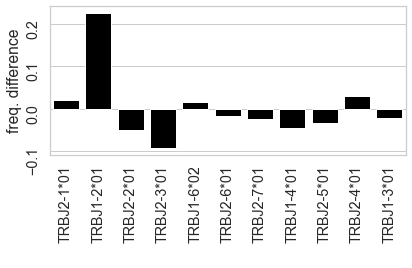

In [14]:
sns.set_theme(style="whitegrid", palette="colorblind", font_scale=1.3)
fig, ax1 = plt.subplots(1, 1, sharex=True, sharey=False)
splot1 = sns.barplot(data=frequencies[np.abs(frequencies['difference']) >= 0.01], x='JGene', y='difference', color='black')
#splot1.yaxis.grid(True, clip_on=False)     
ax1.set_ylabel('freq. difference')
ax1.tick_params(rotation=90)                                     
ax1.set_xlabel(' ')    
#sns.despine(left=True, bottom=True)       
plt.tight_layout()
plt.savefig(os.path.join(basefolder,plotsfolder,'JGene_frequency_theta'+str(THETA)+'_med_high_TCRs_black.pdf'))

In [15]:
frequencies

,JGene,freq_sample,freq_control,difference,counts_sample
0,TRBJ2-1*01,0.256881,0.236313,0.020568,392
1,TRBJ1-2*01,0.242464,0.018170,0.224294,370
2,TRBJ2-2*01,0.059633,0.110051,-0.050418,91
3,TRBJ2-3*01,0.127130,0.219135,-0.092005,194
4,TRBJ1-6*02,0.054391,0.039419,0.014972,83
5,TRBJ2-6*01,0.017693,0.035276,-0.017583,27
6,TRBJ2-7*01,0.019659,0.044097,-0.024438,30
7,TRBJ1-5*01,0.085190,0.091746,-0.006556,130
8,TRBJ1-4*01,0.017038,0.062953,-0.045915,26
9,TRBJ2-5*01,0.032765,0.066359,-0.033594,50
